In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Importing the dataset
data = pd.read_csv(r'D:\Machine Learning\Polynomial regression\Datasets\data.csv')
data

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [3]:
data.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [5]:
data.shape

(6, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          6 non-null      int64  
 1   Temperature  6 non-null      int64  
 2   Pressure     6 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 276.0 bytes


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sno,6.0,3.500000,1.870829,1.0000,2.2500,3.500,4.750,6.00
Temperature,6.0,50.000000,37.416574,0.0000,25.0000,50.000,75.000,100.00
Pressure,6.0,0.066233,0.105467,0.0002,0.0024,0.018,0.075,0.27


In [9]:
data.isnull().sum()

sno            0
Temperature    0
Pressure       0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.drop('sno', axis=1, inplace=True)

In [12]:
col = data.columns.tolist()
col

['Temperature', 'Pressure']

Temperature


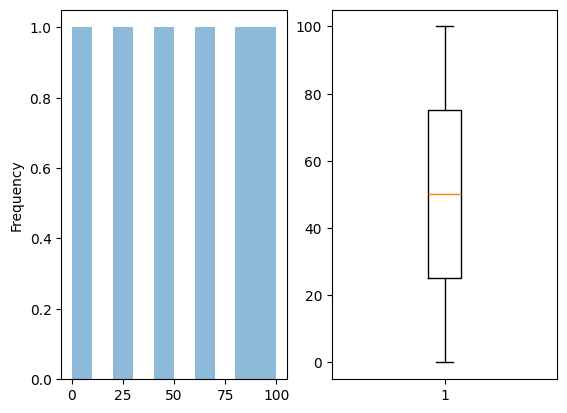

Pressure


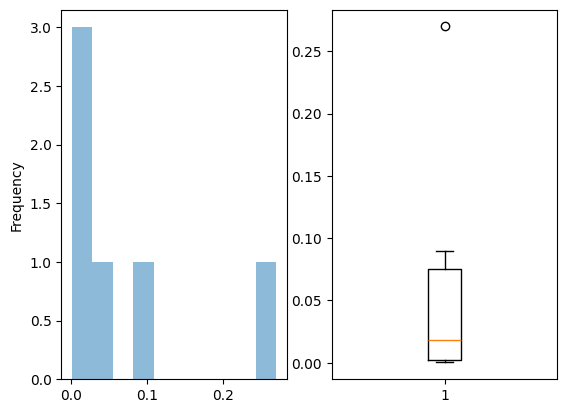

In [13]:
for i in col:
    print(i)
    plt.subplot(1,2,1)
    data[i].plot(kind='hist', bins=10, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.boxplot(data[i])
    
    plt.show()
    

In [14]:
import seaborn as sns

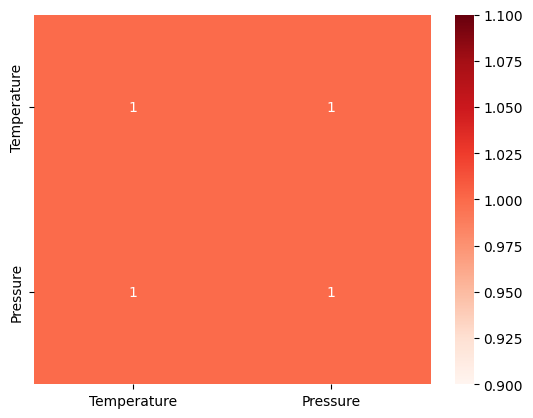

In [17]:
corr = data[col].corr(method='spearman') #spearman
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

In [21]:
# Features and the target variables
X = data[['Temperature']]
y = data[['Pressure']]

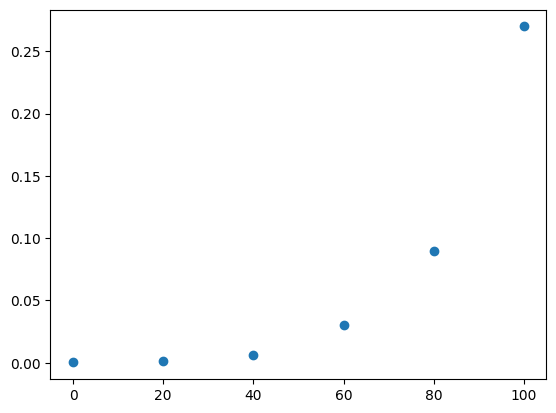

In [20]:
plt.scatter(X, y)
plt.show()

In [22]:
# Fitting Linear Regression to the dataset
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
y_pred = model.predict(X)
y_pred

array([[-0.05086667],
       [-0.00402667],
       [ 0.04281333],
       [ 0.08965333],
       [ 0.13649333],
       [ 0.18333333]])

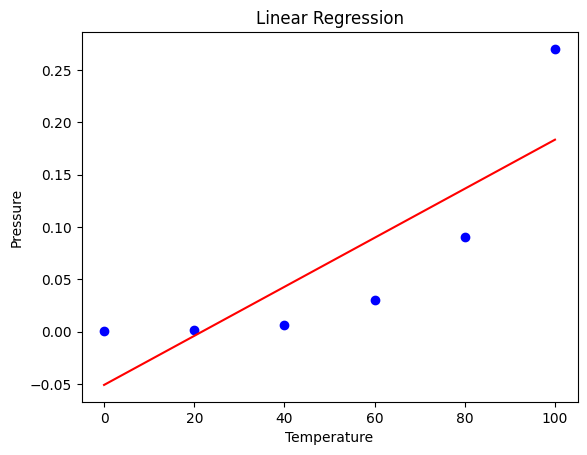

In [24]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

In [28]:
# Fitting Polynomial Regression to the dataset
poly = PolynomialFeatures(degree=5,include_bias=True)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

model1 = LinearRegression()
model1.fit(X_poly, y)

LinearRegression()

In [29]:
y_pred = model1.predict(poly.fit_transform(X))
y_pred

array([[2.00000314e-04],
       [1.20000006e-03],
       [5.99999994e-03],
       [2.99999999e-02],
       [8.99999998e-02],
       [2.70000000e-01]])

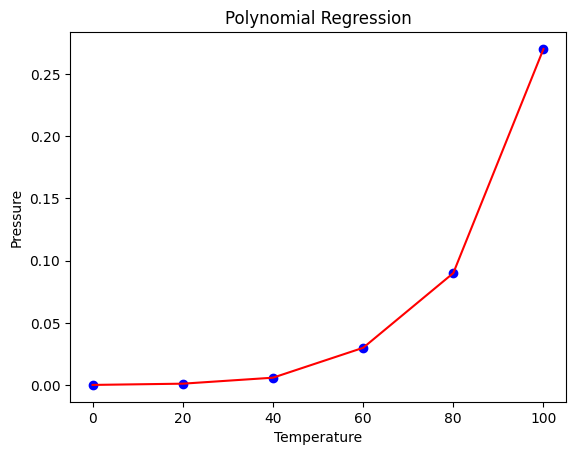

In [30]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

In [33]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 5   # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_train_poly)


# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
r2_train = r2_score(y_train, y_pred)

print("RMSE:", train_rmse)
print("R-squared:", r2_train)

RMSE: 1.2569564985088413e-16
R-squared: 1.0


The Root Mean Squared Error (RMSE) is a measure of the differences between the predicted and actual values in a regression model. It represents the standard deviation of the residuals (prediction errors). Lower RMSE values indicate a better fit of the model to the data.